In [1]:
from pathlib import Path 
import sys
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.individ_group as ig
import ProbabilisticParcellation.plot as ppp
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as ss

fig_dir = '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts'

## Concatenate data

In [82]:
# Import tsv file
for k,key in enumerate(['language', 'demand', 'social', 'general']):
    fname = ut.model_dir+ f'/Models/Evaluation_03/localizer_battery_{key}_sym32.tsv'
    D = pd.read_csv(fname,sep='\t')
    if k==0:
        Data = D
    else:
        Data = pd.concat([Data,D])
Data['mask'] = 'whole cerebellum'


# Add the spatially constrained data
for k,key in enumerate(['language', 'demand', 'social', 'general']):
    fname = ut.model_dir+ f'/Models/Evaluation_03/localizer_battery_{key}_sym32_spatial.tsv'
    D = pd.read_csv(fname,sep='\t')
    Data = pd.concat([Data,D])

fname_all = ut.model_dir+ f'/Models/Evaluation_03/localizer_battery_sym32_all.tsv'
Data.to_csv(fname_all,sep='\t')
Data.tail()

,Unnamed: 0,type,runs,dcbc,subject,localizer,mask
3955,0,data and group,14,0.152319,24,general,social_demand
3956,0,data,15,0.154961,24,general,social_demand
3957,0,data and group,15,0.148232,24,general,social_demand
3958,0,data,16,0.152681,24,general,social_demand
3959,0,data and group,16,0.148221,24,general,social_demand


### Load results and plot Figure

In [106]:
def plot_dcbc_localizer(fname,normalize=True, mask='whole cerebellum'):
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')
    D = D[D['mask']==mask]
    gm = D.dcbc[D.type=='group'].mean()
    ## Subtract the value of 'group' from the individual dcbc values
    if normalize:
        A=pd.pivot_table(D[D.type=='group'],values='dcbc',index='subject')
        baseline = A.loc[D.subject,'dcbc'].values 
        D.dcbc=D.dcbc-baseline+gm
    sb.lineplot(data=D[D.type=='data and group'],y='dcbc',x='runs',
                hue='localizer',
                errorbar='se',
                markers=True, dashes=False)
    sb.despine()
    runs = np.arange(16,dtype=int)+1
    labels = [f'{i*4}' if (i==1 or i%4==0) else '' for i in runs]

    plt.xticks(ticks=runs,labels=labels)
    plt.xlabel('Functional localizer [min]')
    plt.axhline(gm,color='b',ls=':')
    plt.title(f'{mask}')



In [107]:
def plot_dcbc_localizer_spatial(fname,normalize=True):
    plt.figure(figsize=(20,15))
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')
    for i,mask in enumerate(D['mask'].unique()):
        plt.subplot(3,2,i+1)
        plot_dcbc_localizer(fname,normalize=normalize,mask=mask)
               


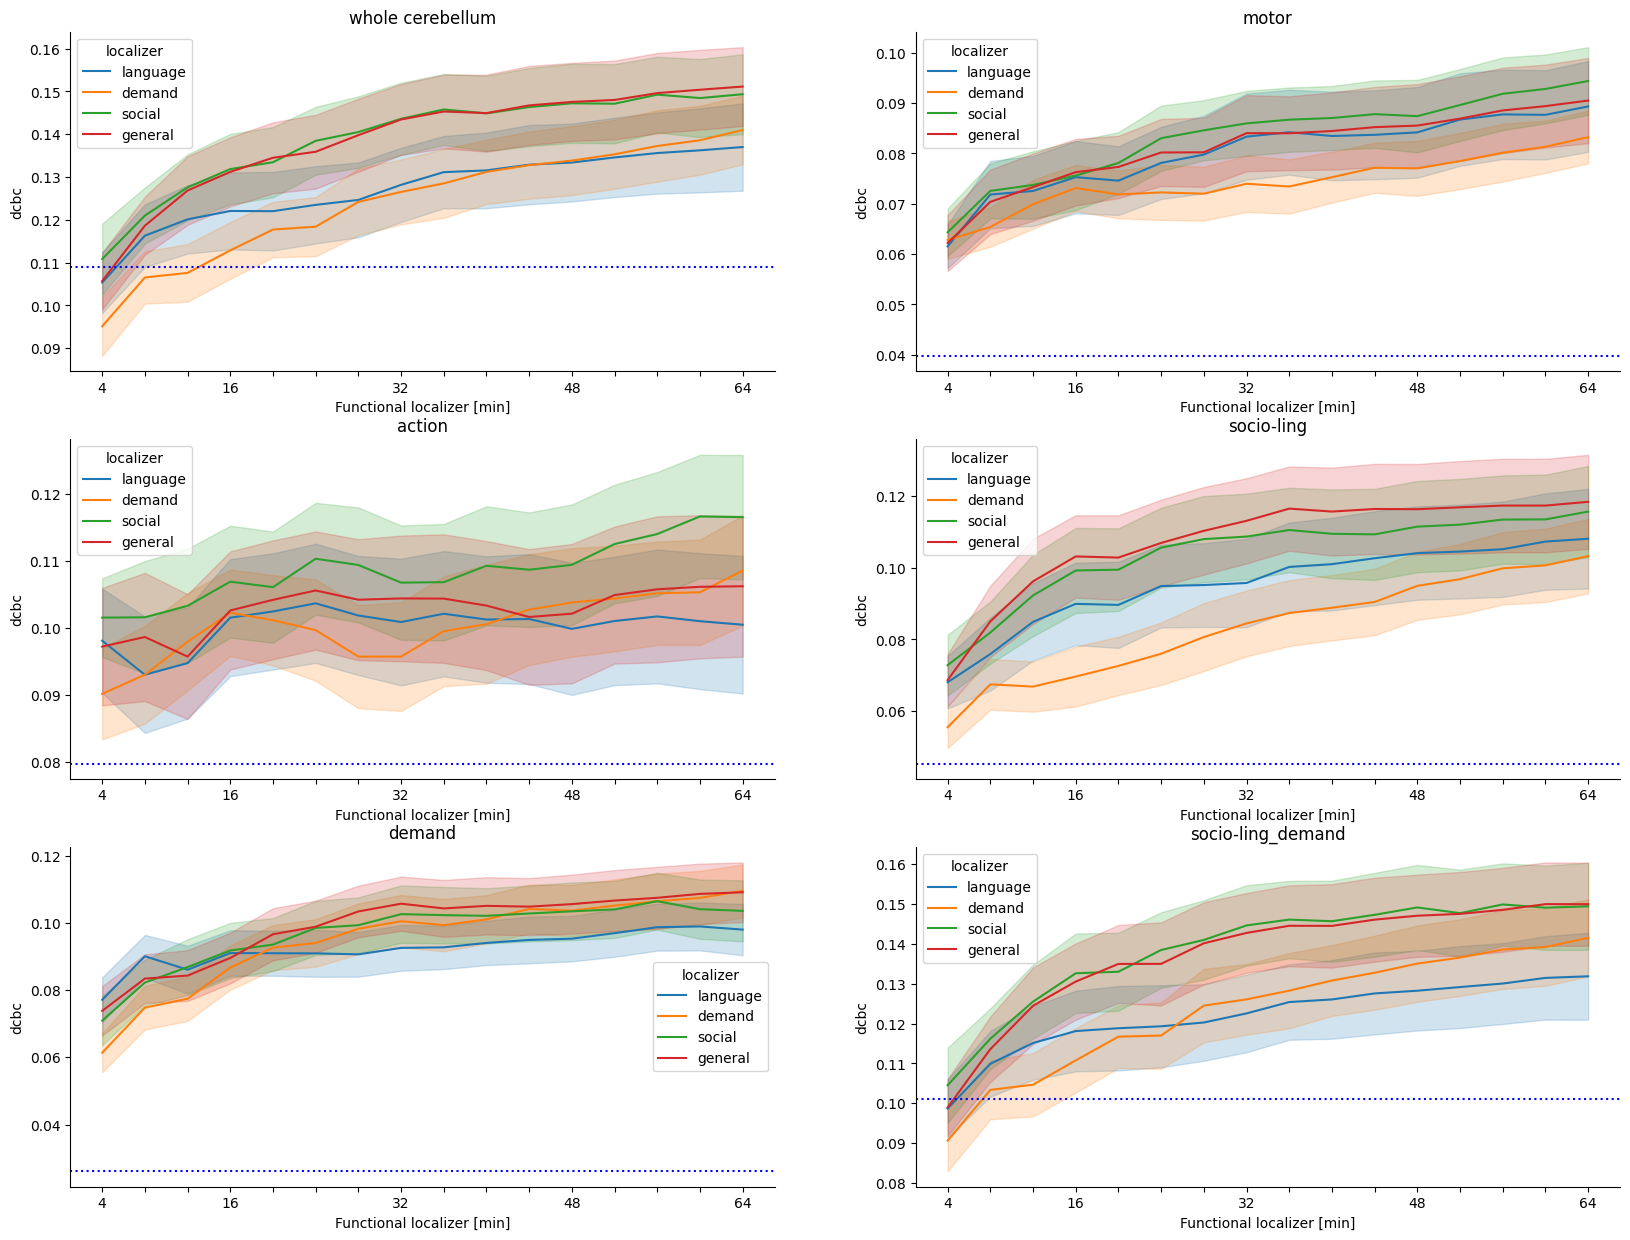

In [108]:
plot_dcbc_localizer_spatial(f'localizer_battery_sym32_spatial1.tsv')

In [27]:
def plot_dcbc(fname,normalize=True):
    plt.figure(figsize=(5,4))
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')
    gm = D.dcbc[D.type=='group'].mean()
    ## Subtract the value of 'group' from the individual dcbc values
    if normalize:
        A=pd.pivot_table(D[D.type=='group'],values='dcbc',index='subject')
        baseline = A.loc[D.subject,'dcbc'].values 
        D.dcbc=D.dcbc-baseline+gm
    sb.lineplot(data=D[D.type!='group'],y='dcbc',x='runs',
                hue='type', 
                errorbar='se',
                markers=True, dashes=False)
    sb.despine()
    runs = np.arange(16,dtype=int)+1
    labels = [f'{i*10}' if (i==1 or i%4==0) else '' for i in runs]

    plt.xticks(ticks=runs,labels=labels)
    plt.xlabel('Functional localizer [min]')
    plt.axhline(gm,color='b',ls=':')



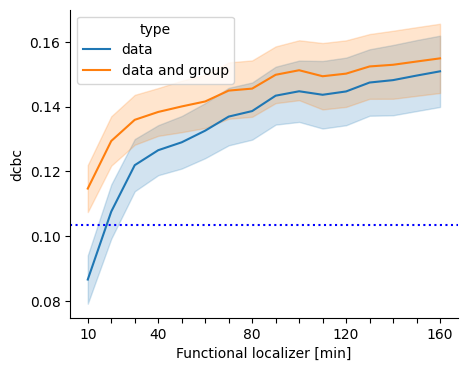

In [28]:
plot_dcbc('indivgroup_NettekovenSym32.tsv')
